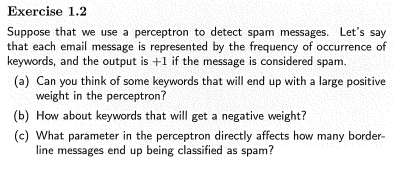

a) si palabras como promoción, Sólo por hoy, amenaza, Exclusivo, Últimas horas, etc.

b) información, caso, adjunto, Confirmación, check in, registro, exitoso.

c) principalmente son los usuarios quienes envian la información, si los correos muchas personas agregan usuarios sospechosos esos van a ser clasificados.

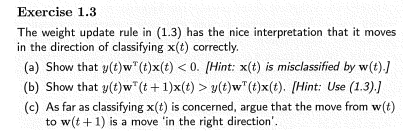

por definicion de la regla de actualización de pesos:

$w(t+1) = w(t) + y(t) * x(t)$

Sea $x(t)$ tal que este clasificado incorrectamente 
$y(t) * w(t) * x(t) ≤ 0$ lo cual implica que el modelo predijo mal para este valor.

sea $w(t+1)$ y $x(t)$ su producto acalar:

- $w(t+1)*x(t)$

- $(w(t) + y(t) * x(t)) * x(t)$

- $w(t) * x(t) + y(t) * x(t) * x(t)$

- $w(t+1) * x(t) = w(t) * x(t) + y(t) * ||x(t)||^2$ esto por $(t) * x(t) \geq 0$


$y(t) * ||x(t)||^{2}$ es un factor de escala positivo de $x(t)$ esto tiene una afectación positiva en los pesos

En el caso $x(t)$ está clasificado incorrectamente por $w(t)$ entonces $y(t) * w(t) * x(t) ≤ 0$, para este caso $y(t) * ||x(t)||^{2}$ es positivo lo cual implica que el vector de pesos se dirige hacia $x(t)$ logrando corregir la clasificación correcta.






b)


*$=y(t)w^T(t+1)x(t)$

*$= y(t) \left(w(t)+y(t)x(t)\right)^{T}x(t)$ 

*$= y(t)\left(w^T(t) + y(t)x^T(t)\right)x(t)$

*$= y(t)w^T(t)x(t) + y(t)y(t)x^T(t)x(t)\gt y(t)w^T(t)x(t)$

podemos observar que $y(t)w^T(t)x(t)$ es creciente en cada actualización.

Si $y(t)$ es positivo pero $w^T(t)x(t)$ es negativo, podemos movernos desde $w^T(t)x(t)$ hacia un valor positivo.

Sin embargo, si $y(t)$ es negativo pero $w^T(t)x(t)$ es positivo, $y(t)w^T(t)x(t)$ sigue siendo creciente mientras que $w^T(t)x(t)$ es decreciente.

Por lo tanto, al movernos desde $w(t)$ hacia $w(t+1)$, estamos avanzando en la dirección correcta siempre y cuando nos centremos en la clasificación de $x(t)$.

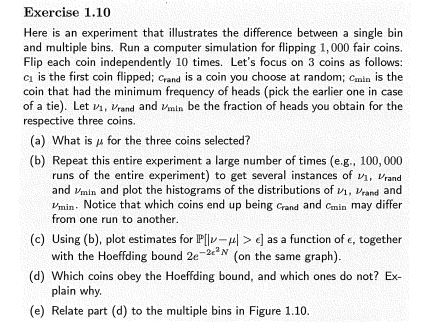

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import math
from sklearn.preprocessing import normalize
from functools import partial

In [ ]:
#Se Lanzan las 1000 monedas 10 veces
flips = np.random.binomial(1, 0.5, (1000, 10))

# Obtener los resultados de cada moneda
coin1 = flips[0]
coin2 = flips[np.random.choice(1000)]
coin3 = flips[np.argmin(np.sum(flips, axis=1))]

# Calcular las fracciones de caras para cada moneda
f1 = np.mean(coin1)
f2 = np.mean(coin2)
f3 = np.mean(coin3)

In [ ]:
f1, f2, f3

(0.4, 0.3, 0.0)

b) repetir el modelo 1000 veces

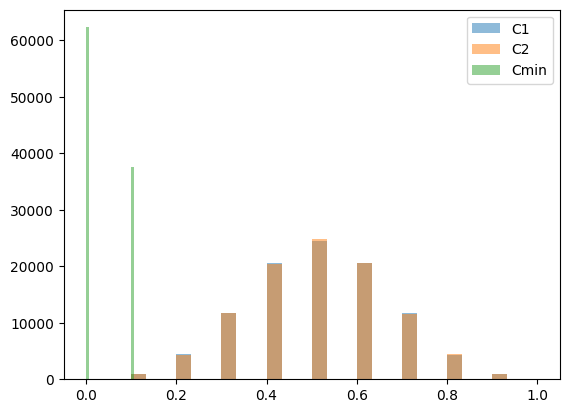

In [ ]:
# Repetir el experimento 100000 veces
n_trials = 100000 
results = np.zeros((n_trials, 3)) #Se crea un array de numpy llamado results que tendrá n_trials filas y 3 columnas. Esta matriz se usará para almacenar los resultados de cada repetición del experimento.
for i in range(n_trials):#e inicia un bucle for que se ejecutará n_trials veces.

    flips = np.random.binomial(1, 0.5, (1000, 10))#se generan aleatoriamente 1000 series de 10 lanzamientos de monedas
    coin1 = flips[0] #e define la variable coin1 como la primera serie de lanzamientos.
    coin2 = flips[np.random.choice(1000)] #se elige aleatoriamente una serie de lanzamientos de moneda y se define como coin2.
    coin3 = flips[np.argmin(np.sum(flips, axis=1))] #se busca la serie de lanzamientos de moneda con la menor cantidad de caras y se define como coin3.
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)] #se calcula la fracción de caras para cada una de las tres series de lanzamientos y se almacenan en la i-ésima fila de la matriz results.

# Graficar los histogramas de las distribuciones
plt.hist(results[:, 0], bins=30, alpha=0.5, label='C1')
plt.hist(results[:, 1], bins=30, alpha=0.5, label='C2')
plt.hist(results[:, 2], bins=30, alpha=0.5, label='Cmin')
plt.legend(loc='upper right')
plt.show()

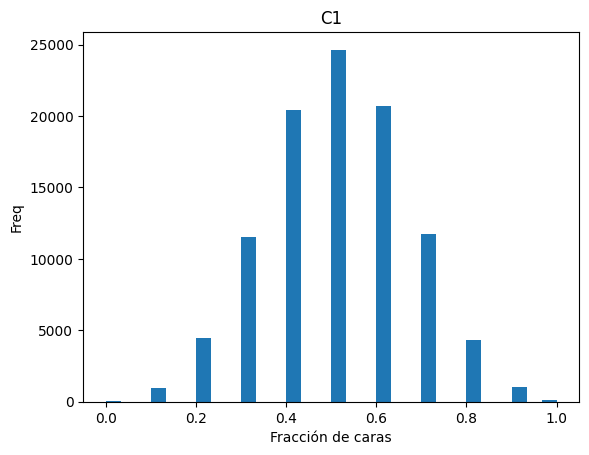

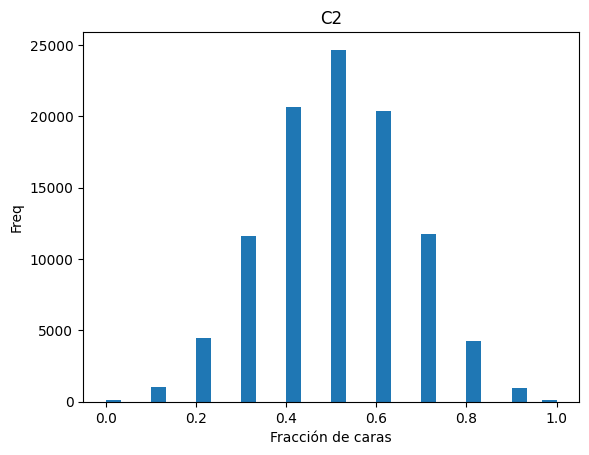

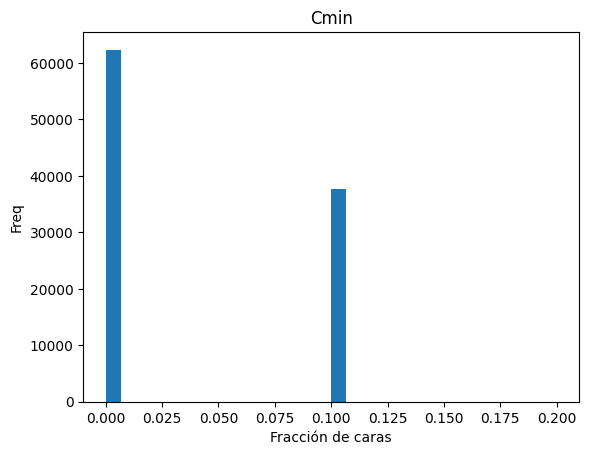

In [ ]:
n_trials = 100000
results = np.zeros((n_trials, 3))
for i in range(n_trials):
    flips = np.random.binomial(1, 0.5, (1000, 10))
    coin1 = flips[0]
    coin2 = flips[np.random.choice(1000)]
    coin3 = flips[np.argmin(np.sum(flips, axis=1))]
    results[i] = [np.mean(coin1), np.mean(coin2), np.mean(coin3)]

# Graficar el histograma de El
plt.hist(results[:, 0], bins=30)
plt.title('C1')
plt.xlabel('Fracción de caras')
plt.ylabel('Freq')
plt.show()

# Graficar el histograma de Mrand
plt.hist(results[:, 1], bins=30)
plt.title('C2')
plt.xlabel('Fracción de caras')
plt.ylabel('Freq')
plt.show()

# Graficar el histograma de Cmin
plt.hist(results[:, 2], bins=30)
plt.title('Cmin')
plt.xlabel('Fracción de caras')
plt.ylabel('Freq')
plt.show()

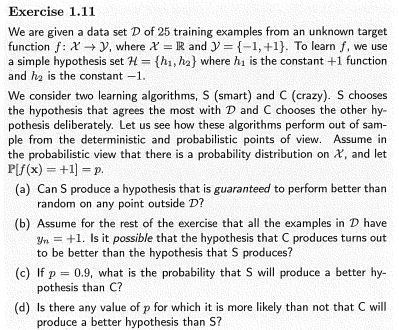

a) H consta de dos hipótesis: h₁, que siempre predice +1, y h₂, que siempre predice -1. El algoritmo de aprendizaje S elige la hipótesis que coincide más con los datos de entrenamiento D.

Dado que S selecciona la hipótesis que coincide con la mayoría de los ejemplos en D, siempre elegirá h₁ si p ≥ 0,5 (la mayoría de los ejemplos tienen la etiqueta +1) y h₂ si p < 0,5 (la mayoría de los ejemplos tienen la etiqueta -1). Por lo tanto, S nunca superará al azar fuera de D, ya que simplemente selecciona la hipótesis que coincide con la mayoría de los ejemplos de entrenamiento.





b) S como C eligen la misma hipótesis h₁ en este escenario, no hay diferencia entre las hipótesis producidas por S y C. Por lo tanto, no es posible que la hipótesis producida por C sea mejor que la hipótesis producida por S, ya que son idénticas.

c) Si p = 0.9, significa que la función objetivo f asigna la etiqueta +1 al 90%. En este caso, S elegirá la hipótesis h₁ (que siempre predice +1). C elige deliberadamente la hipótesis h₂ (que siempre predice -1). Dado que h₂ predice lo opuesto a las etiquetas verdaderas en D, tendrá una tasa de error del 0.9 o 90% en los ejemplos de entrenamiento. En este caso, la probabilidad de que f asigne la etiqueta -1 a un punto es (1 - p) = (1 - 0.9) = 0.1. Por lo tanto, la probabilidad de que S produzca una hipótesis mejor que C es del 0.1 o 10%

d) Cuándo es más probable que C produzca una hipótesis mejor que S, necesitamos encontrar el valor de p para el cual la tasa de error de C es menor que la de S. En otras palabras, queremos:

0.5 - p < p

Simplificando la desigualdad, obtenemos:

0.5 < 2p

Dividiendo ambos lados por 2, obtenemos:

0,25 < p



---

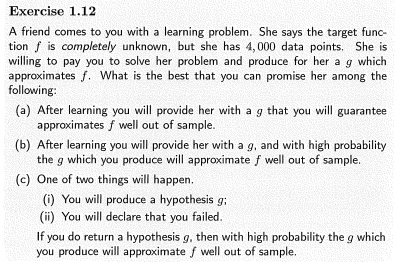

lo mejor que le puedo ofrecer es la opción c, en la cual si la función construida bajo la hipotesis aplica la herramineta podra generalizar y podra ser la f, pero si no no era en cierta medida generalizar.

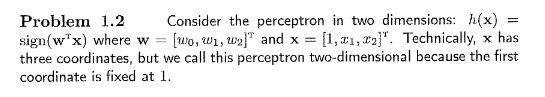

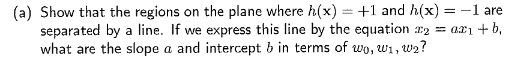

sea $h(x) = sing(\bar{w}^{T}\bar{x})$,  donde $\bar{w}\epsilon R^{3}$

tambien sea $x_{2}=ax_{2}+b$

a es la pendiente: para $a=0$, la linea es horizontal
para $a>0$ esta creciente, b es punto de corte.

Sea el eje $x_{2}$ en $x_{2}=b$, para la linea que pasa por el origen si y solo si b=0.

entonces: 



1.   $x_{2}=ax_{2}+b$
2.   $x_{2} -ax_{2}-b=0$
3.   $\begin{vmatrix}
1 & -a  & b
\end{vmatrix} \begin{vmatrix}
x_{2}
\\ 
x_{1}
\\ 
1
\end{vmatrix} = 0$

para el caso de $R^{3}$ $\bar{w}^{T}\bar{x}$ es el hiperplano

sea para el caso $h(x) = 0$ generalizado para $\begin{vmatrix}w_{0} & w_{1}  & w_{2}
\end{vmatrix}$

comunmente $w_{0}$ hace referencia al punto de corte del hiperplano:


1. $\begin{vmatrix}w_{0} & w_{1}  & w_{2}
\end{vmatrix}\begin{vmatrix}
1
\\ 
x_{1}
\\ 
x_{2}
\end{vmatrix} = 0$

2. $w_{0}+w_{1}x_{1} +w_{1}x_{1}=0$

tambien este hiperplano separa dos grupos $h(x) = -1$ & $h(x) = 1$ 

respectivamente, sea $h(x) = sign(y(x)) = 1$ para $x\epsilon H_{+1} $, de la misma forma $h(x) = sign(y(x)) = -1$ para $x\epsilon H_{-1} $



a continuación se presenta un plano que muestra la idea inicial en python



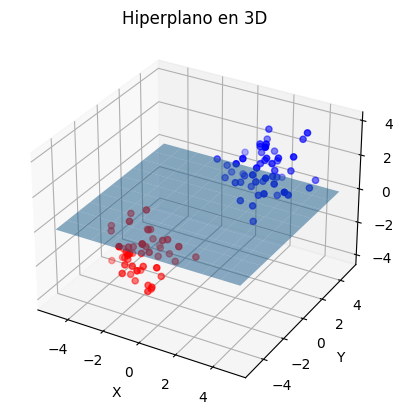

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generar puntos aleatorios
np.random.seed(0)
positive_points = np.random.randn(50, 3) + 2
negative_points = np.random.randn(50, 3) - 2

# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos positivos
ax.scatter(positive_points[:, 0], positive_points[:, 1], positive_points[:, 2], c='b', marker='o')

# Graficar los puntos negativos
ax.scatter(negative_points[:, 0], negative_points[:, 1], negative_points[:, 2], c='r', marker='o')

# Crear el hiperplano
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
z = (0) * (1 * xx + -1 * yy) / 1 

# Graficar el hiperplano
ax.plot_surface(xx, yy, z, alpha=0.5)

# Configurar el aspecto del gráfico
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Hiperplano en 3D')

# Mostrar el gráfico
plt.show()

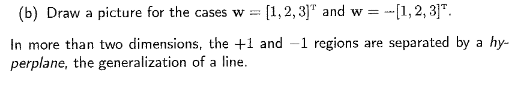

para ambos casos el hiperplano es $2x_{1}+3x_{2} +1=0$

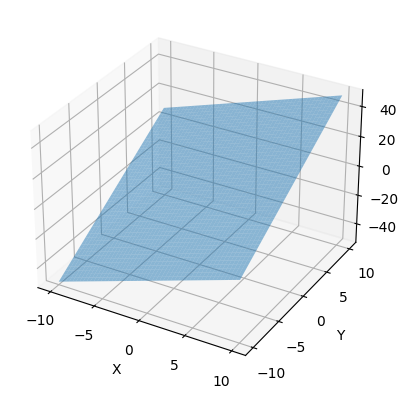

In [ ]:

# Crear los datos para el plano
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = (2*X + 3*Y - 1)  # Aquí dividimos por 0 para obtener la ecuación del hiperplano

# Crear la figura y el eje tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar el hiperplano
ax.plot_surface(X, Y, Z, alpha=0.5)

# Configurar los ejes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar el gráfico
plt.show()

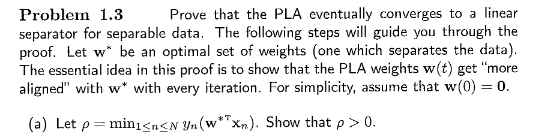

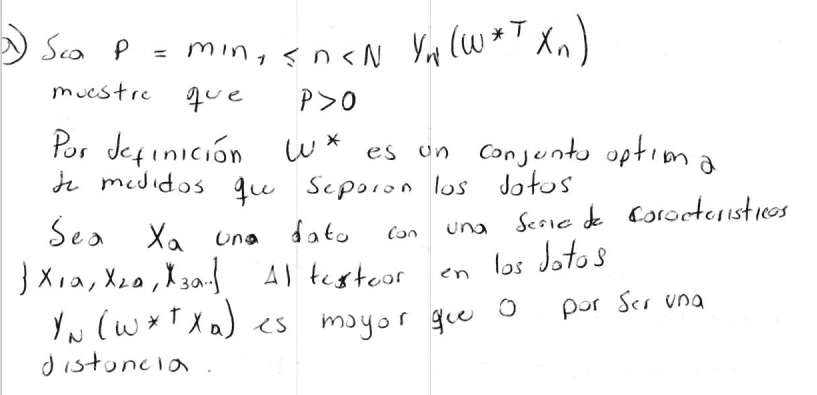

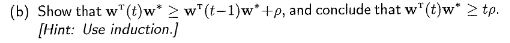

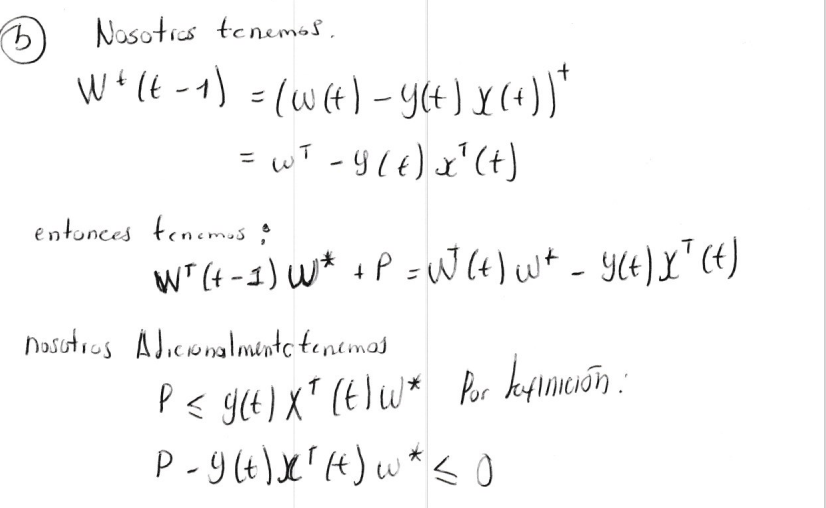

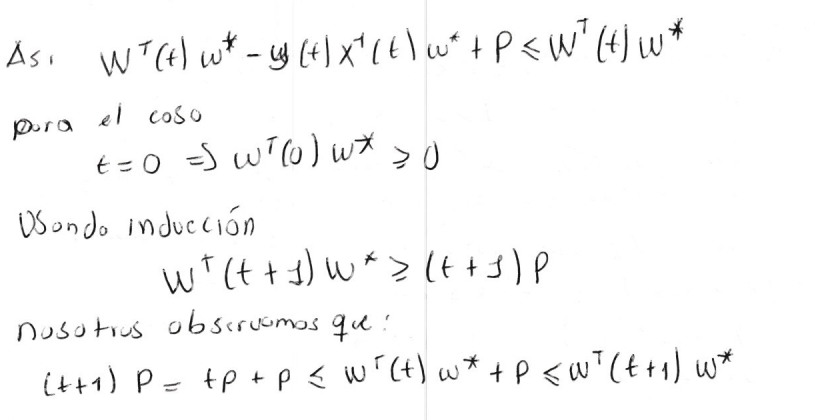

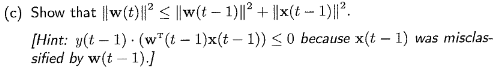

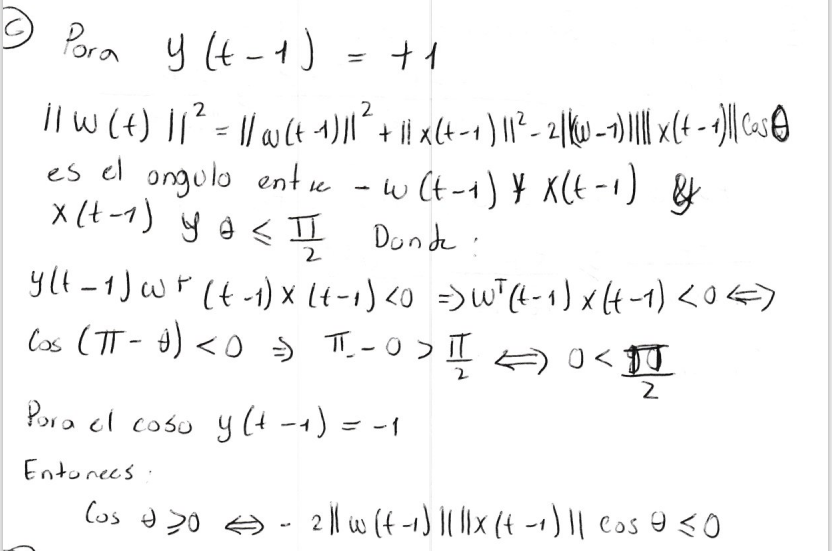

1.3cd.PNG

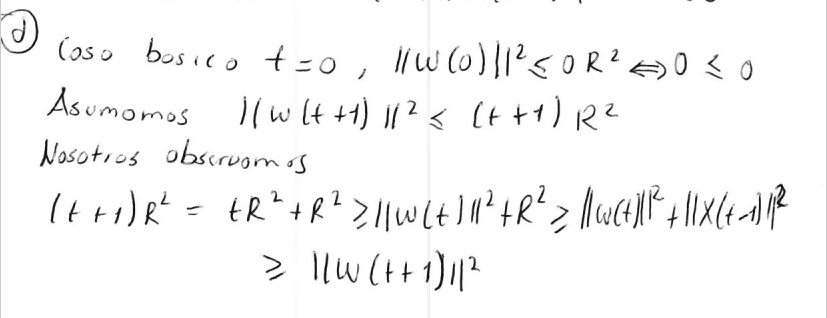

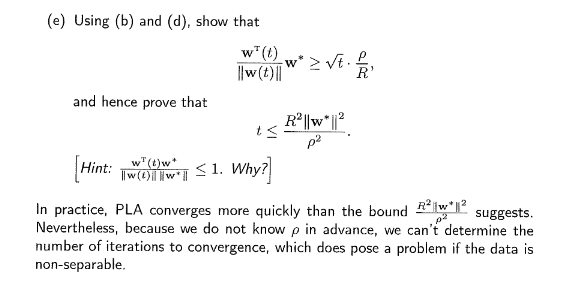

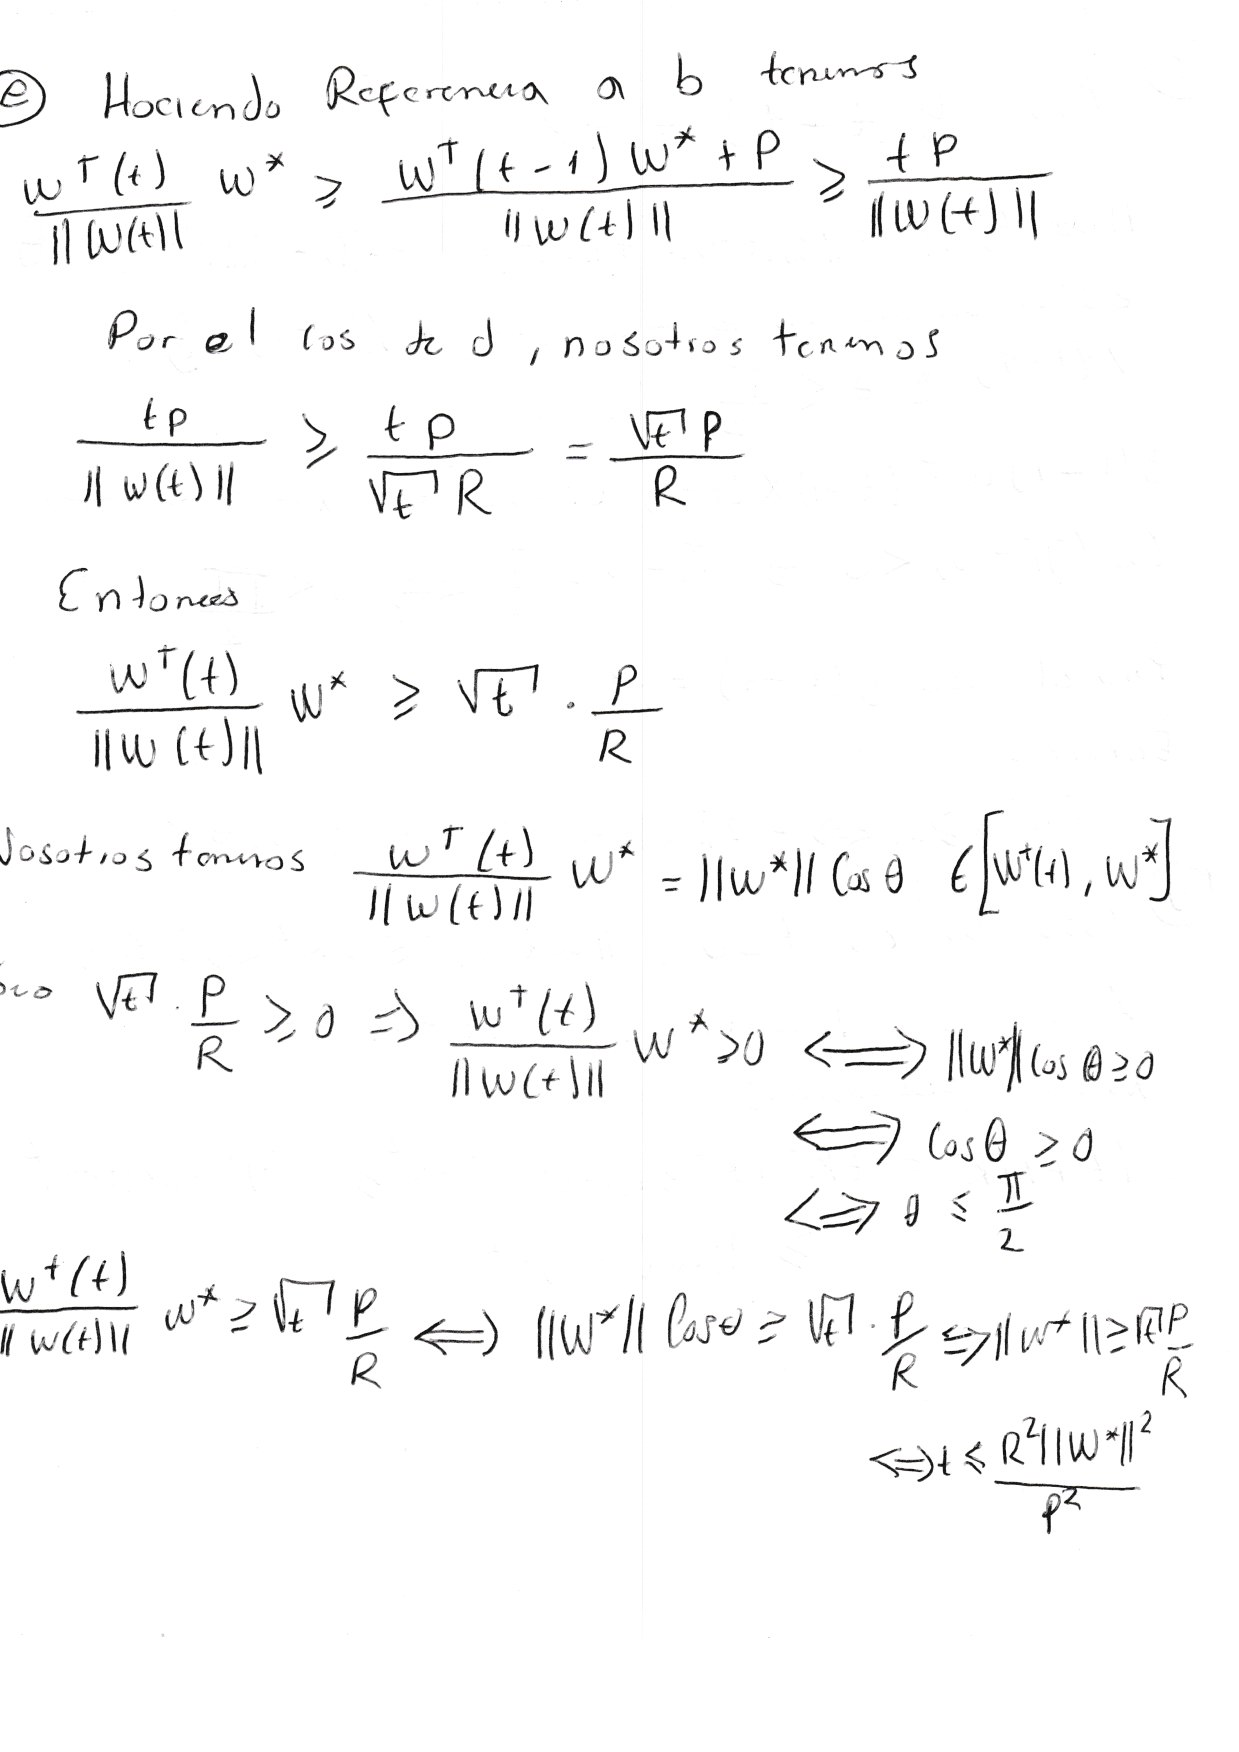